In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score



uber_data = pd.read_csv('UberDataset.csv')  
uber_data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [16]:
#Q2
uber_data.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

In [17]:
#Q3
uber_data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [18]:
#Q4
#Check for missing values in each column
missing_values = uber_data.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)
# Check for duplicate rows
duplicate_rows = uber_data.duplicated().sum()
print("\nNumber of Duplicate Rows:")
print(duplicate_rows)

Missing Values in Each Column:
START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

Number of Duplicate Rows:
1


In [19]:
#Q5
# Compute summary statistics for numerical features
numerical_summary = uber_data.describe()
# Compute summary statistics for categorical features
categorical_summary = uber_data.describe(include=['object'])
# Print summaries
print("Numerical Summary:")
print(numerical_summary)

print("\nCategorical Summary:")
print(categorical_summary)


Numerical Summary:
              MILES
count   1156.000000
mean      21.115398
std      359.299007
min        0.500000
25%        2.900000
50%        6.000000
75%       10.400000
max    12204.700000

Categorical Summary:
             START_DATE         END_DATE  CATEGORY START  STOP  PURPOSE
count              1156             1155      1155  1155  1155      653
unique             1155             1154         2   177   188       10
top     6/28/2016 23:34  6/28/2016 23:59  Business  Cary  Cary  Meeting
freq                  2                2      1078   201   203      187


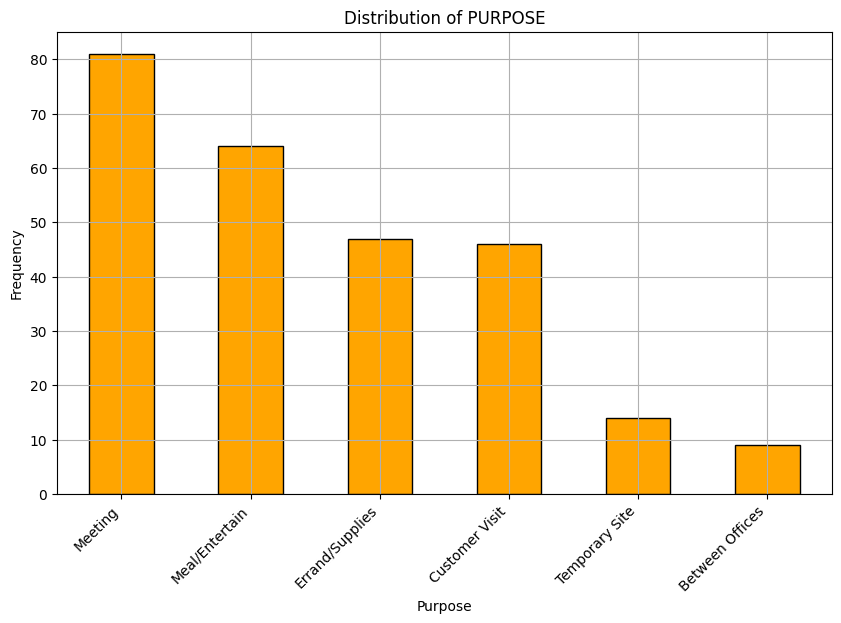

In [80]:
#Q6
# Visualize trip purposes
plt.figure(figsize=(10, 6))
uber_data['PURPOSE'].value_counts().plot(kind='bar', color='orange', edgecolor='black')
plt.title('Distribution of PURPOSE')
plt.xlabel('Purpose')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

([0, 1], [Text(0, 0, 'Business'), Text(1, 0, 'Personal')])

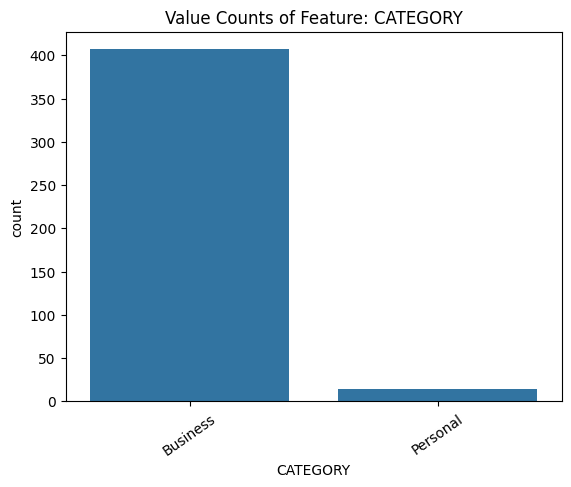

In [77]:
#Q6
#Visualize trip category
sns.countplot(x=uber_data["CATEGORY"])
plt.title("Value Counts of Feature: CATEGORY")
plt.xticks(rotation=35)

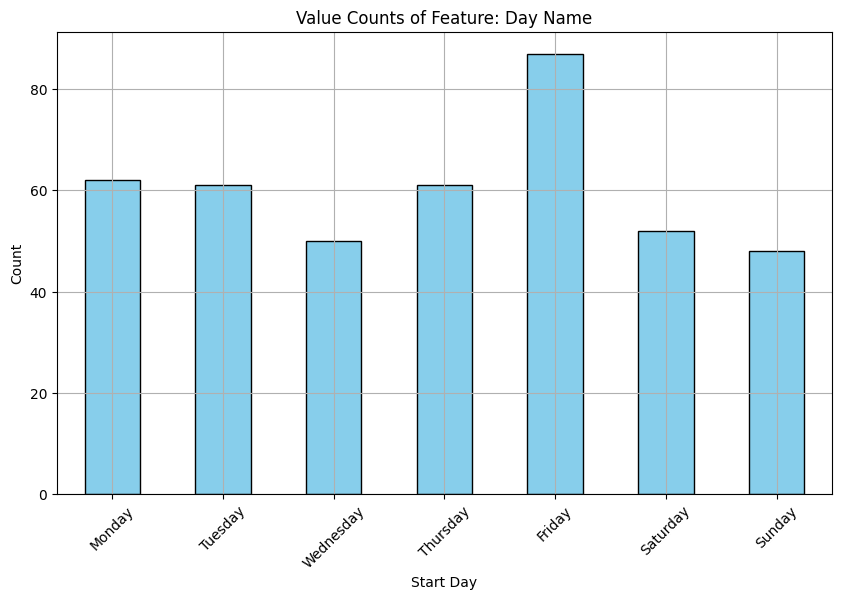

In [63]:
#Q6
#the number of trips per each day

uber_data['START_DATE'] = pd.to_datetime(uber_data['START_DATE'], errors='coerce')

# Drop rows where START_DATE could not be converted
uber_data = uber_data.dropna(subset=['START_DATE'])

# Extract the day names
uber_data['Day Name'] = uber_data['START_DATE'].dt.day_name()

# Plot the distribution of trips by day of the week
plt.figure(figsize=(10, 6))
day_counts = uber_data['Day Name'].value_counts()
day_counts = day_counts.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])  # Ensure proper order

day_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Value Counts of Feature: Day Name')
plt.xlabel('Start Day')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

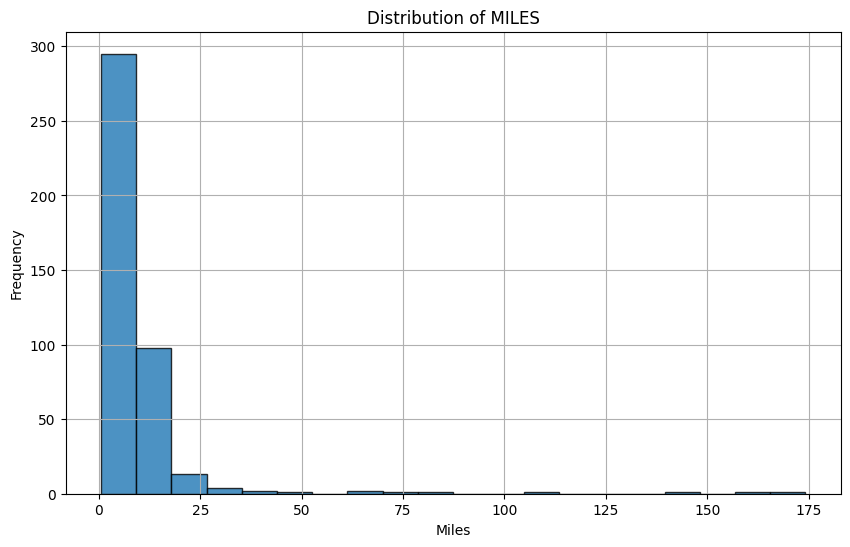

In [74]:
#Q6
# Histogram for MILES
plt.figure(figsize=(10, 6))
plt.hist(uber_data['MILES'], bins=20, edgecolor='black', alpha=0.8)
plt.title('Distribution of MILES')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

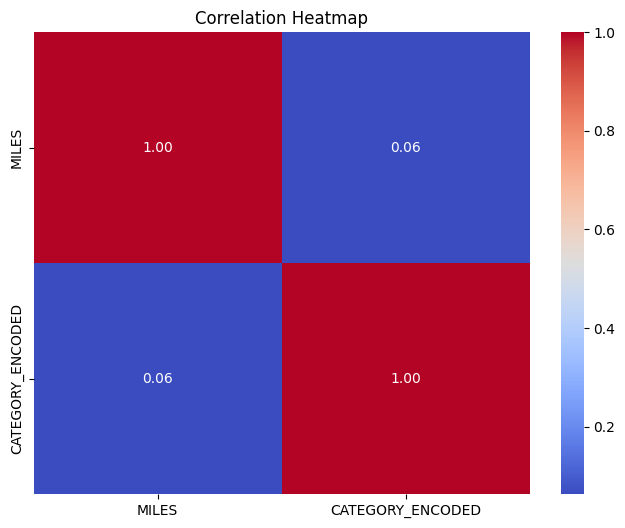

In [81]:
#Q7
uber_data['CATEGORY_ENCODED'] = uber_data['CATEGORY'].map({'Business': 1, 'Personal': 0})

# Correlation matrix
corr_matrix = uber_data[['MILES', 'CATEGORY_ENCODED']].corr()

# Heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


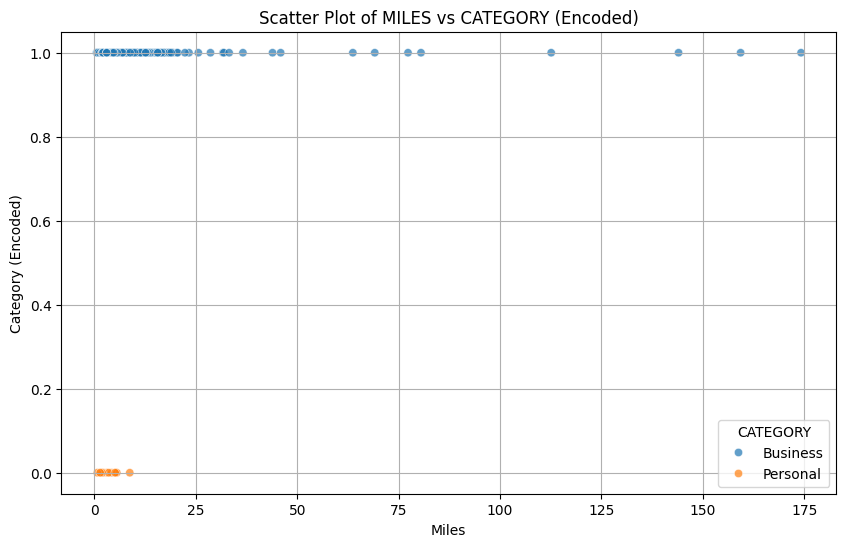

In [83]:
#6
#Scatter plot: MILES vs CATEGORY_ENCODED
plt.figure(figsize=(10, 6))
sns.scatterplot(data=uber_data, x='MILES', y='CATEGORY_ENCODED', hue='CATEGORY', alpha=0.7)
plt.title('Scatter Plot of MILES vs CATEGORY (Encoded)')
plt.xlabel('Miles')
plt.ylabel('Category (Encoded)')
plt.grid(True)
plt.show()

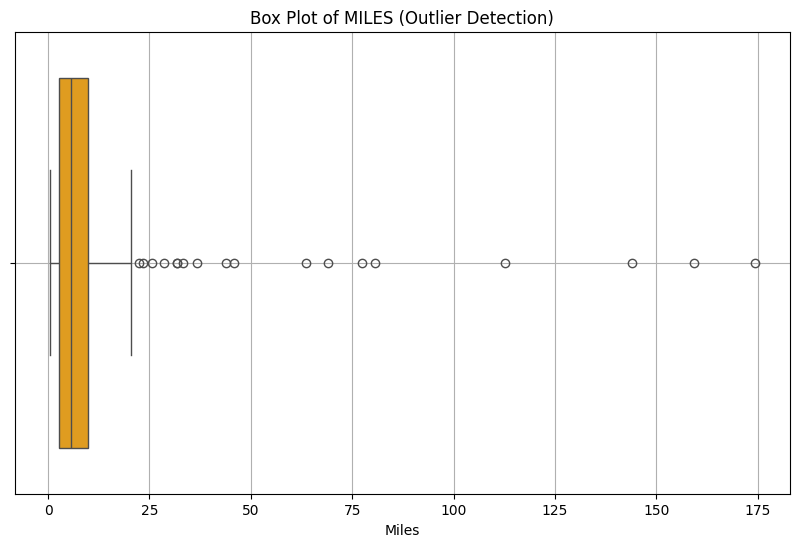

Lower Bound: -7.8500000000000005
Upper Bound: 20.55
Number of Outliers Detected: 18


In [85]:
#Q8
# Box plot for MILES
plt.figure(figsize=(10, 6))
sns.boxplot(x=uber_data['MILES'], color='orange')
plt.title('Box Plot of MILES (Outlier Detection)')
plt.xlabel('Miles')
plt.grid(True)
plt.show()


# IQR method for detecting outliers
Q1 = uber_data['MILES'].quantile(0.25)
Q3 = uber_data['MILES'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = uber_data[(uber_data['MILES'] < lower_bound) | (uber_data['MILES'] > upper_bound)]

# Print results
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Number of Outliers Detected: {outliers.shape[0]}")

In [87]:
#Q9
# Drop rows with missing values in critical columns
critical_columns = ['CATEGORY', 'START', 'STOP']
uber_data_cleaned = uber_data.dropna(subset=critical_columns)

# Impute missing values in PURPOSE with the most frequent value
most_frequent_purpose = uber_data_cleaned['PURPOSE'].mode()[0]
uber_data_cleaned['PURPOSE'].fillna(most_frequent_purpose, inplace=True)

# Show the result
print(f"Remaining missing values:\n{uber_data_cleaned.isnull().sum()}")

Remaining missing values:
START_DATE          0
END_DATE            0
CATEGORY            0
START               0
STOP                0
MILES               0
PURPOSE             0
Day Name            0
CATEGORY_ENCODED    0
dtype: int64


/var/folders/ds/sgyztk796v92cg3wzpxy6tq40000gn/T/ipykernel_40282/3052486114.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  uber_data_cleaned['PURPOSE'].fillna(most_frequent_purpose, inplace=True)


In [93]:
#Q9
def replace_unknown_location (row):
    if row['START'] == "Unknown Location" and row['STOP'] != "Unknown Location":
        row[ 'START' ] = row['STOP' ]
    elif row[ 'STOP'] == "Unknown Location" and row[ 'START'] != "Unknown Location":
        row[ 'STOP'] = row[ 'START' ]
    return row
# Apply the function to each row in the DataFrame
data = uber_data.apply(replace_unknown_location, axis=1)

In [97]:
#Q10
# Label encode the CATEGORY column
label_encoder = LabelEncoder()
uber_data['CATEGORY_ENCODED'] = label_encoder.fit_transform(uber_data['CATEGORY'])

# One-hot encode the START, STOP, and PURPOSE columns
uber_data_encoded = pd.get_dummies(uber_data, columns=['START', 'STOP', 'PURPOSE'], drop_first=True)

# Show the result
print(uber_data_encoded)

            START_DATE          END_DATE  CATEGORY    MILES  CATEGORY_ENCODED  \
0     01-01-2016 21:11  01-01-2016 21:17  Business      5.1                 0   
1     01-02-2016 01:25  01-02-2016 01:37  Business      5.0                 0   
2     01-02-2016 20:25  01-02-2016 20:38  Business      4.8                 0   
3     01-05-2016 17:31  01-05-2016 17:45  Business      4.7                 0   
4     01-06-2016 14:42  01-06-2016 15:49  Business     63.7                 0   
...                ...               ...       ...      ...               ...   
1151  12/31/2016 13:24  12/31/2016 13:42  Business      3.9                 0   
1152  12/31/2016 15:03  12/31/2016 15:38  Business     16.2                 0   
1153  12/31/2016 21:32  12/31/2016 21:50  Business      6.4                 0   
1154  12/31/2016 22:08  12/31/2016 23:51  Business     48.2                 0   
1155            Totals               NaN       NaN  12204.7                 2   

      START_Almond  START_A

In [99]:
#Q11
# Standard Scaling (mean=0, std=1) for MILES
scaler = StandardScaler()
uber_data['MILES_STANDARDIZED'] = scaler.fit_transform(uber_data[['MILES']])

# Alternatively, Min-Max Scaling (range [0, 1])
min_max_scaler = MinMaxScaler()
uber_data['MILES_NORMALIZED'] = min_max_scaler.fit_transform(uber_data[['MILES']])

# Show scaled values
print(uber_data[['MILES', 'MILES_STANDARDIZED', 'MILES_NORMALIZED']].head())

   MILES  MILES_STANDARDIZED  MILES_NORMALIZED
0    5.1           -0.044593          0.000377
1    5.0           -0.044872          0.000369
2    4.8           -0.045429          0.000352
3    4.7           -0.045707          0.000344
4   63.7            0.118573          0.005179


In [104]:
#Q14
# Ensure CATEGORY is scaled
uber_data['CATEGORY_ENCODED'] = uber_data['CATEGORY'].map({'Business': 1, 'Personal': 0})

# Ensure MILES is scaled
scaler = StandardScaler()
uber_data['MILES_STANDARDIZED'] = scaler.fit_transform(uber_data[['MILES']])

# Define features and target
X = uber_data[['MILES_STANDARDIZED']]  # Standardized MILES
y = uber_data['CATEGORY_ENCODED']  # Encoded target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 924 samples
Testing set size: 232 samples


In [108]:
#Q15
# Load and preprocess data
uber_data['CATEGORY_ENCODED'] = uber_data['CATEGORY'].map({'Business': 1, 'Personal': 0})

# Drop rows with missing values in features or target
uber_data_cleaned = uber_data.dropna(subset=['MILES', 'CATEGORY_ENCODED'])

# Scale the MILES feature
scaler = StandardScaler()
uber_data_cleaned['MILES_STANDARDIZED'] = scaler.fit_transform(uber_data_cleaned[['MILES']])

# Define features and target
X = uber_data_cleaned[['MILES_STANDARDIZED']]
y = uber_data_cleaned['CATEGORY_ENCODED']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Evaluate training performance
y_train_pred = logistic_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

Training Accuracy: 0.93


/var/folders/ds/sgyztk796v92cg3wzpxy6tq40000gn/T/ipykernel_40282/734545044.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_data_cleaned['MILES_STANDARDIZED'] = scaler.fit_transform(uber_data_cleaned[['MILES']])


In [110]:
#Q16
# Predict on the test set
y_test_pred = logistic_model.predict(X_test)

# Calculate and print metrics
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_test_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_test_pred):.2f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred):.2f}")

Test Accuracy: 0.94
Precision: 0.94
Recall: 1.00
F1-Score: 0.97


In [113]:
#Q18
# Define parameter grid for Logistic Regression
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Grid search for best hyperparameter
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Best parameter and model
best_model = grid_search.best_estimator_
print(f"Best C value: {grid_search.best_params_['C']}")

# Evaluate on test set
y_test_pred = best_model.predict(X_test)
print(f"Improved Test F1-Score: {f1_score(y_test, y_test_pred):.2f}")

Best C value: 0.01
Improved Test F1-Score: 0.97


In [116]:
#Q19
# Perform 5-fold cross-validation
logistic_model = LogisticRegression(C=0.01, random_state=42)
cv_scores = cross_val_score(logistic_model, X, y, cv=5, scoring='f1')

# Print cross-validation results
print(f"Cross-Validation F1-Scores: {cv_scores}")
print(f"Mean F1-Score: {cv_scores.mean():.2f}")

Cross-Validation F1-Scores: [0.96644295 0.96644295 0.96644295 0.96412556 0.96412556]
Mean F1-Score: 0.97


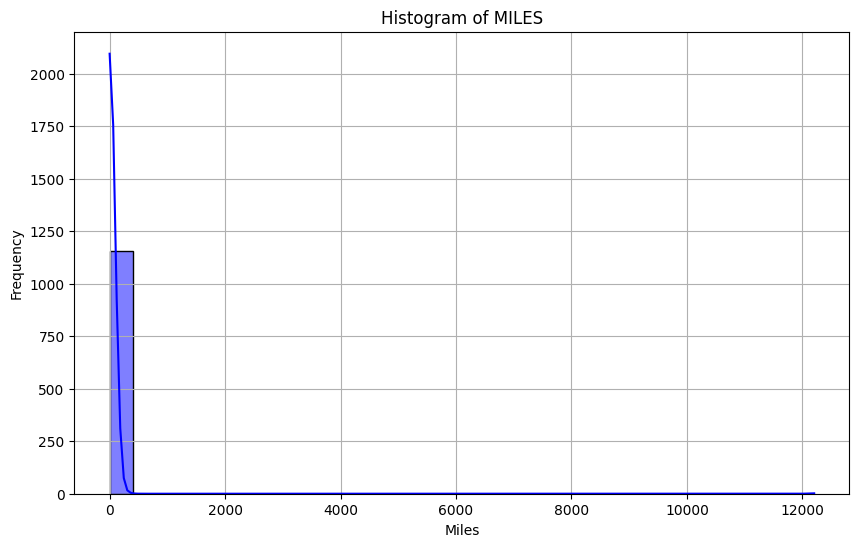

In [117]:
#Q21
# Histogram for MILES
plt.figure(figsize=(10, 6))
sns.histplot(uber_data['MILES'], bins=30, kde=True, color='blue')
plt.title('Histogram of MILES')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

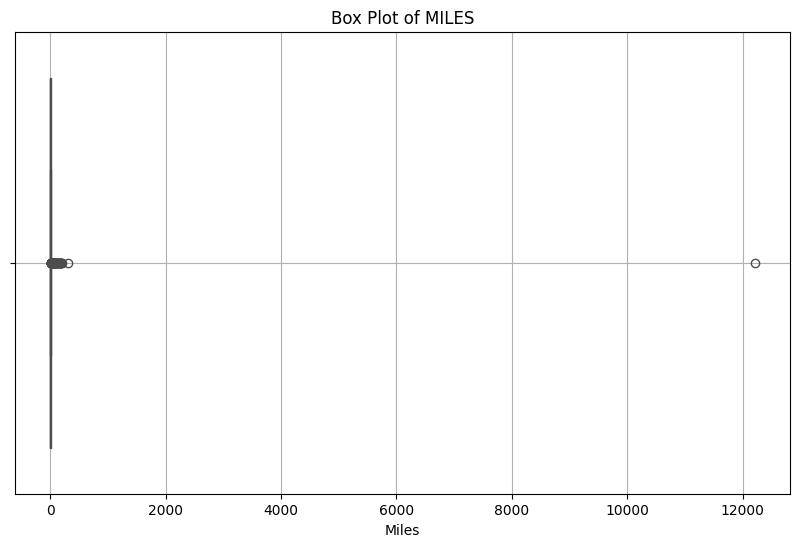

In [119]:
#Q21
# Boxplot for MILES
plt.figure(figsize=(10, 6))
sns.boxplot(x=uber_data['MILES'], color='orange')
plt.title('Box Plot of MILES')
plt.xlabel('Miles')
plt.grid(True)
plt.show()

/var/folders/ds/sgyztk796v92cg3wzpxy6tq40000gn/T/ipykernel_40282/3030893626.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=uber_data, x='CATEGORY', palette='viridis')


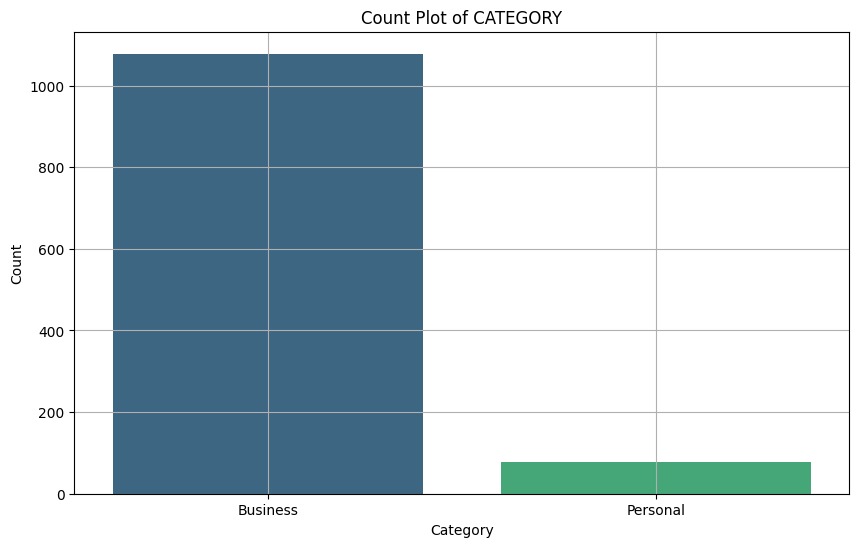

In [120]:
#Q21
# Bar plot for CATEGORY
plt.figure(figsize=(10, 6))
sns.countplot(data=uber_data, x='CATEGORY', palette='viridis')
plt.title('Count Plot of CATEGORY')
plt.xlabel('Category')
plt.ylabel('Count')
plt.grid(True)
plt.show()

/var/folders/ds/sgyztk796v92cg3wzpxy6tq40000gn/T/ipykernel_40282/1730791691.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=uber_data, y='PURPOSE', order=uber_data['PURPOSE'].value_counts().index, palette='coolwarm')


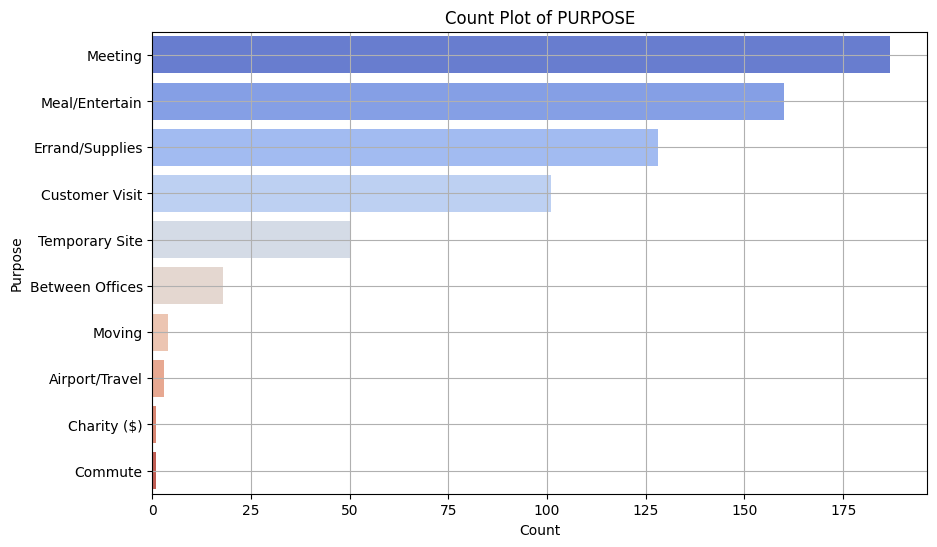

In [121]:
#Q21
# Bar plot for PURPOSE
plt.figure(figsize=(10, 6))
sns.countplot(data=uber_data, y='PURPOSE', order=uber_data['PURPOSE'].value_counts().index, palette='coolwarm')
plt.title('Count Plot of PURPOSE')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.grid(True)
plt.show()

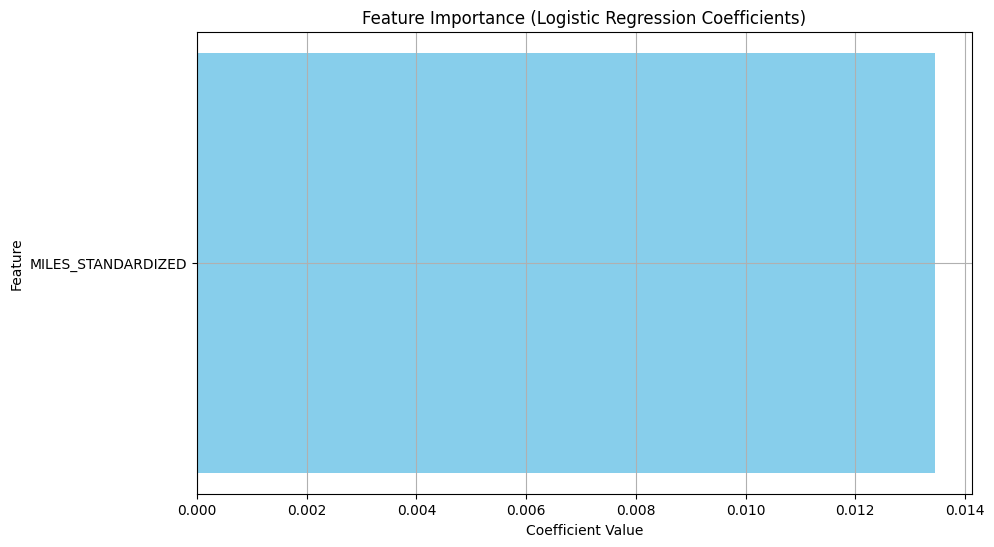

In [125]:
#Q22
# Ensure coefficients are extracted correctly
feature_names = X_train.columns
coefficients = best_model.coef_[0]  

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients, color='skyblue')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(True)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


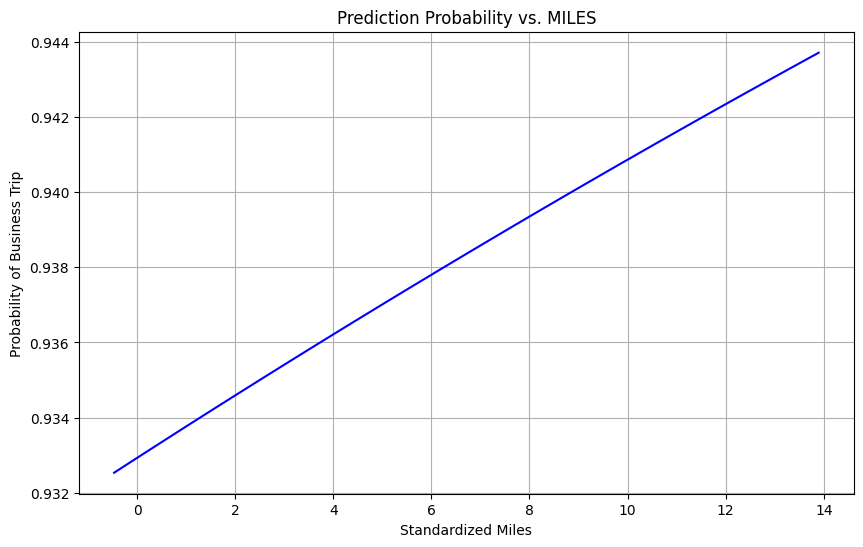

In [127]:
#Q23
# Ensure you're using the tuned model
miles_range = np.linspace(X['MILES_STANDARDIZED'].min(), X['MILES_STANDARDIZED'].max(), 100).reshape(-1, 1)
probabilities = best_model.predict_proba(miles_range)[:, 1]  # Use best_model from tuning

# Plot probability vs. MILES
plt.figure(figsize=(10, 6))
plt.plot(miles_range, probabilities, color='blue')
plt.title('Prediction Probability vs. MILES')
plt.xlabel('Standardized Miles')
plt.ylabel('Probability of Business Trip')
plt.grid(True)
plt.show()

/var/folders/ds/sgyztk796v92cg3wzpxy6tq40000gn/T/ipykernel_40282/703203755.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_data_cleaned['Predicted_Prob'] = best_model.predict_proba(X)[:, 1]


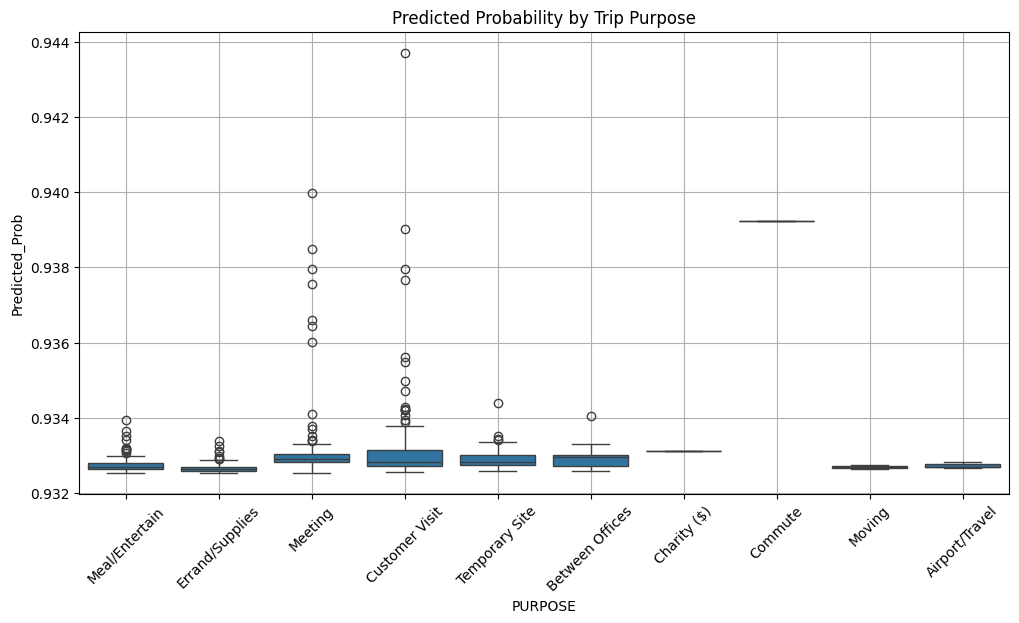

In [128]:
#Q23
# Box plot by PURPOSE
uber_data_cleaned['Predicted_Prob'] = best_model.predict_proba(X)[:, 1]
plt.figure(figsize=(12, 6))
sns.boxplot(data=uber_data_cleaned, x='PURPOSE', y='Predicted_Prob')
plt.title('Predicted Probability by Trip Purpose')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()